
Problem Statement:


Domain - Stock Market 

Dataset -Tata Motors Stock Market Data

Questions to be answered

1. What was the best time you will suggest your client to buy stock of Tata Motors?
2. Is there any seasonality in the data?
3. Is there any trend in the data?
4. What is the lowest month average for Closing ?
5. What is the highest month average for Closing ?
 
Share your sheet with some useful insights for your client and right strategies to follow in this scenario.

Share outcome of the project.

In [62]:
import numpy as np
import pandas as pd
import seaborn  as sns
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series        # To work on series 
%matplotlib inline 
import os
os.chdir(r'C:\Users\Shyam Adsul\Python codes SSPU\Data sets')

df = pd.read_csv('TATAMOTORS.NS.csv',parse_dates=['Date'],index_col="Date")

#here date is object   | Not work with astype()
#df['Date'] = df['Date'].apply(pd.to_datetime)

In [63]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-02-22,312.450012,313.899994,302.149994,304.500000,304.500000,57723298.0
2021-02-23,308.500000,328.899994,308.500000,324.000000,324.000000,133310157.0
2021-02-24,325.000000,330.000000,316.500000,321.649994,321.649994,50821757.0
2021-02-25,325.350006,334.700012,323.250000,333.149994,333.149994,64514912.0
2021-02-26,323.000000,332.950012,318.850006,322.950012,322.950012,91901339.0


In [64]:
df.shape

(534, 6)

The Open and Close columns indicate the opening and closing price of the stocks on a particular day.

The High and Low columns provide the highest and the lowest price for the stock on a particular day, respectively.

The Volume column tells us the total volume of stocks traded on a particular day.

In [65]:
#fill missing dates
daily_index = pd.date_range(start="2019-01-01",end="2021-02-26",freq='D')
daily_index


DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10',
               ...
               '2021-02-17', '2021-02-18', '2021-02-19', '2021-02-20',
               '2021-02-21', '2021-02-22', '2021-02-23', '2021-02-24',
               '2021-02-25', '2021-02-26'],
              dtype='datetime64[ns]', length=788, freq='D')

In [66]:
daily_index.difference(df.index)

DatetimeIndex(['2019-01-05', '2019-01-06', '2019-01-12', '2019-01-13',
               '2019-01-19', '2019-01-20', '2019-01-26', '2019-01-27',
               '2019-02-02', '2019-02-03',
               ...
               '2021-01-24', '2021-01-26', '2021-01-30', '2021-01-31',
               '2021-02-06', '2021-02-07', '2021-02-13', '2021-02-14',
               '2021-02-20', '2021-02-21'],
              dtype='datetime64[ns]', length=254, freq=None)

In [67]:
#asfreq
df.index

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-07', '2019-01-08', '2019-01-09', '2019-01-10',
               '2019-01-11', '2019-01-14',
               ...
               '2021-02-15', '2021-02-16', '2021-02-17', '2021-02-18',
               '2021-02-19', '2021-02-22', '2021-02-23', '2021-02-24',
               '2021-02-25', '2021-02-26'],
              dtype='datetime64[ns]', name='Date', length=534, freq=None)

In [68]:
df1 = df.asfreq('D',method='pad')
df1

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-01,173.500000,174.199997,171.300003,173.449997,173.449997,6715543.0
2019-01-02,170.600006,171.750000,168.000000,168.550003,168.550003,13410104.0
2019-01-03,169.000000,170.149994,165.100006,166.050003,166.050003,9321842.0
2019-01-04,169.000000,171.949997,168.500000,170.949997,170.949997,17650435.0
2019-01-05,169.000000,171.949997,168.500000,170.949997,170.949997,17650435.0
...,...,...,...,...,...,...
2021-02-22,312.450012,313.899994,302.149994,304.500000,304.500000,57723298.0
2021-02-23,308.500000,328.899994,308.500000,324.000000,324.000000,133310157.0
2021-02-24,325.000000,330.000000,316.500000,321.649994,321.649994,50821757.0


In [71]:
df1 = df.fillna(method = 'ffill',inplace= True)
df1

In [70]:
df1.info()

AttributeError: 'NoneType' object has no attribute 'info'

In [18]:
df1.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

<AxesSubplot:xlabel='Date'>

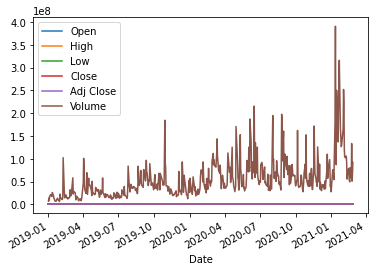

In [19]:
%matplotlib inline 
df1.plot()


<AxesSubplot:xlabel='Date'>

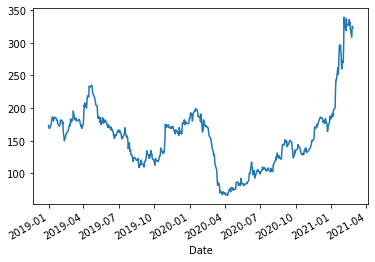

In [20]:
plt.show()
df1['Open'].plot()


<AxesSubplot:xlabel='Date'>

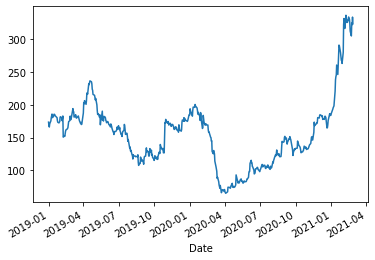

In [21]:
plt.show()
df1.Close.plot()

<AxesSubplot:xlabel='Date'>

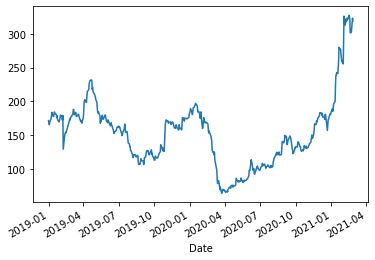

In [22]:
plt.show()
df1.Low.plot()

<AxesSubplot:xlabel='Date'>

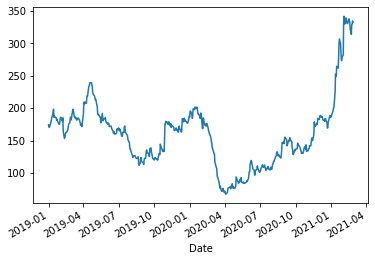

In [23]:
plt.show()
df1.High.plot()

In [55]:
df1.isnull().sum()

Open         9
High         9
Low          9
Close        9
Adj Close    9
Volume       9
dtype: int64

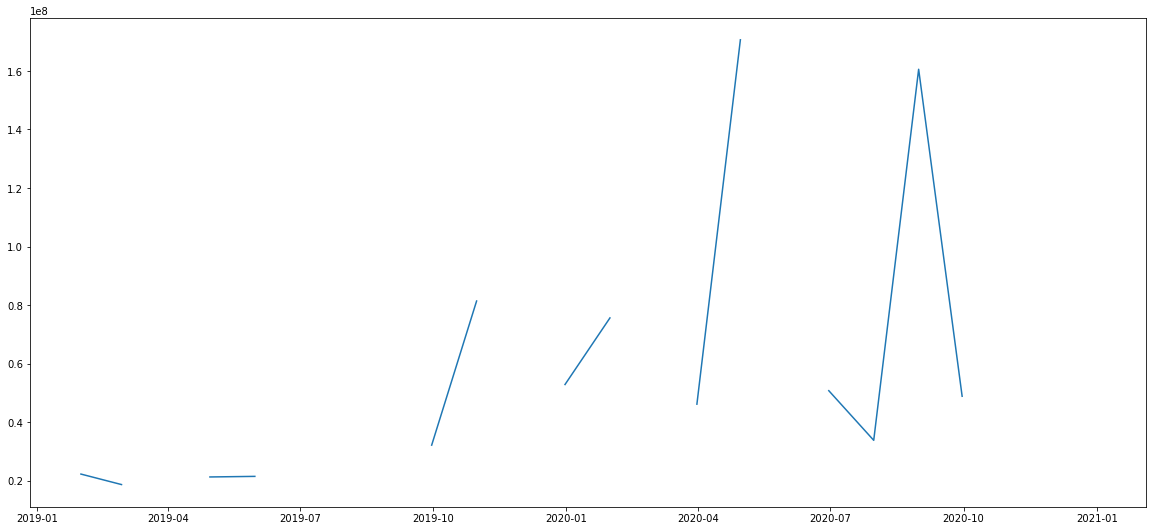

In [53]:
plt.show()
plt.figure(figsize=(20,9))
plt.plot(df1.Volume)

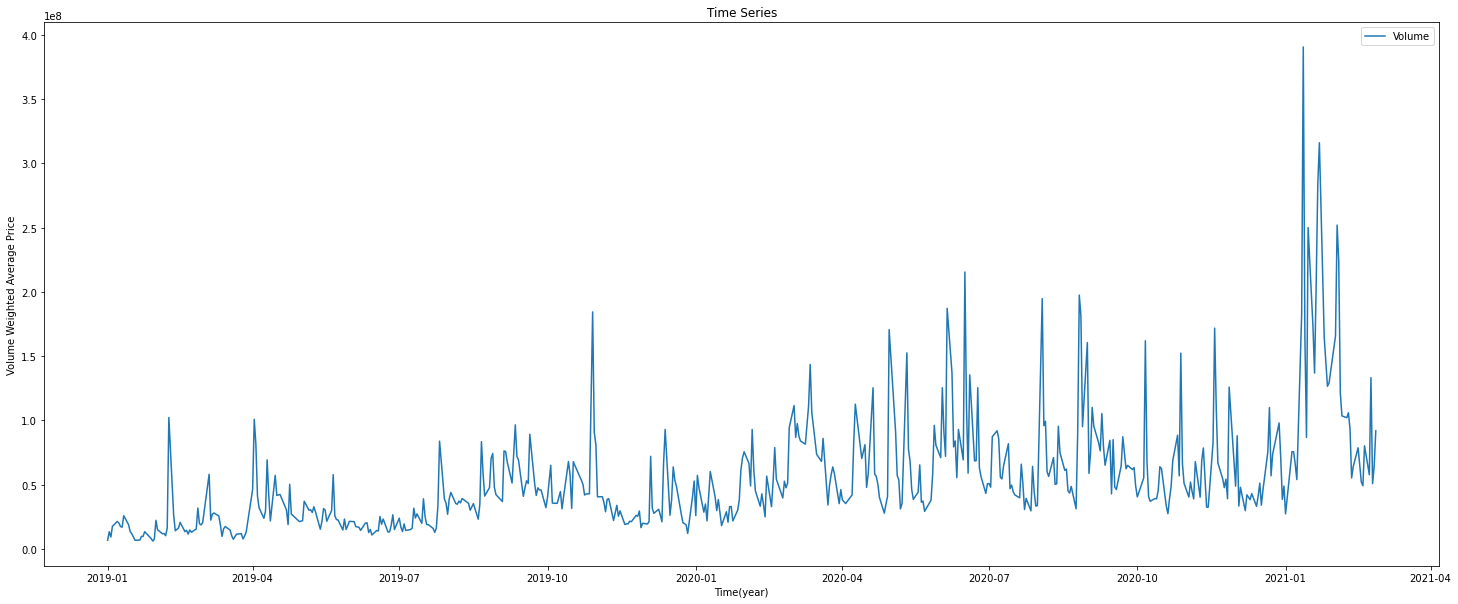

In [25]:
# Visualising the volume 

plt.figure(figsize=(25,10)) 
plt.plot(df1['Volume'], label='Volume') 
plt.title('Time Series') 
plt.xlabel("Time(year)") 
plt.ylabel("Volume Weighted Average Price") 
plt.legend(loc='best')

In [ ]:
#my findings
by above plot we can't say that is there any seasonality or not 

#there is upward trend by plot 

In [51]:
df2 = df.asfreq('M')

In [52]:

df2

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-31,175.800003,183.899994,175.800003,181.199997,181.199997,22277646.0
2019-02-28,180.000000,181.550003,176.600006,177.449997,177.449997,18692372.0
2019-03-31,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-30,216.199997,218.649994,210.300003,214.300003,214.300003,21289116.0
2019-05-31,177.800003,177.850006,170.000000,172.600006,172.600006,21488115.0
2019-06-30,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-31,133.500000,136.399994,132.500000,135.600006,135.600006,27024859.0
2019-08-31,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-30,120.650002,120.849998,116.400002,117.449997,117.449997,32158885.0
